In [1]:
# importing the liabraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import datetime as dt

In [2]:
df=pd.read_csv('COVID_Cases_2.csv')
a = pd.read_csv("State_covid.csv")
df.head()

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
0,1,27-03-2020,Andaman and Nicobar Islands,1,1,0.0,0.0
1,2,28-03-2020,Andaman and Nicobar Islands,6,6,0.0,0.0
2,3,29-03-2020,Andaman and Nicobar Islands,9,9,0.0,0.0
3,4,30-03-2020,Andaman and Nicobar Islands,9,9,0.0,0.0
4,5,31-03-2020,Andaman and Nicobar Islands,10,10,0.0,0.0


# **Data Visualization**

In [3]:
today=df[df.Date == "22-07-2020"]
today.head()

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
117,118,22-07-2020,Andaman and Nicobar Islands,212,53,159.0,0.0
513,514,22-07-2020,Andhra Pradesh,58668,32336,25574.0,758.0
887,888,22-07-2020,Arunachal Pradesh,858,552,303.0,3.0
1262,1263,22-07-2020,Assam,25382,7291,18033.0,58.0
1648,1649,22-07-2020,Bihar,28952,10220,18515.0,217.0


In [4]:
max_confirmed_cases=today.sort_values(by='Confirmed Cases', ascending=False)
max_confirmed_cases.head()

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
7710,7711,22-07-2020,Maharashtra,327031,132538,182217.0,12276.0
11546,11547,22-07-2020,Tamil Nadu,180643,51347,126670.0,2626.0
3159,3160,22-07-2020,Delhi,125096,15288,106118.0,3690.0
5879,5880,22-07-2020,Karnataka,71069,44146,25459.0,1464.0
513,514,22-07-2020,Andhra Pradesh,58668,32336,25574.0,758.0


In [5]:
top_states_confirmed=max_confirmed_cases[0:5]
top_states_confirmed

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
7710,7711,22-07-2020,Maharashtra,327031,132538,182217.0,12276.0
11546,11547,22-07-2020,Tamil Nadu,180643,51347,126670.0,2626.0
3159,3160,22-07-2020,Delhi,125096,15288,106118.0,3690.0
5879,5880,22-07-2020,Karnataka,71069,44146,25459.0,1464.0
513,514,22-07-2020,Andhra Pradesh,58668,32336,25574.0,758.0


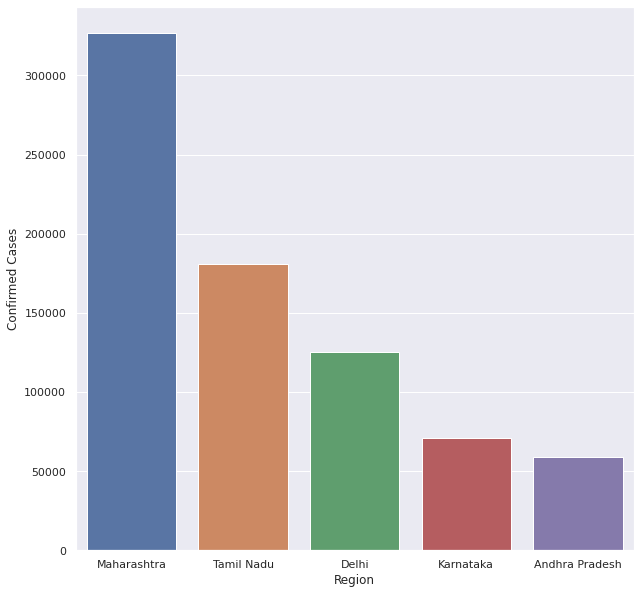

In [6]:
# Making bar graph of top confirmed cases

sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(x='Region',y='Confirmed Cases', data=top_states_confirmed)
plt.show()

In [7]:
# Sorting data w.rt death cases

max_death=today.sort_values(by='Death', ascending=False)
max_death.head()

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
7710,7711,22-07-2020,Maharashtra,327031,132538,182217.0,12276.0
3159,3160,22-07-2020,Delhi,125096,15288,106118.0,3690.0
11546,11547,22-07-2020,Tamil Nadu,180643,51347,126670.0,2626.0
3929,3930,22-07-2020,Gujarat,50379,11760,36423.0,2196.0
5879,5880,22-07-2020,Karnataka,71069,44146,25459.0,1464.0


In [8]:
# Top 5 states having max deaths

top_death_states=max_death[0:5]
top_death_states

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
7710,7711,22-07-2020,Maharashtra,327031,132538,182217.0,12276.0
3159,3160,22-07-2020,Delhi,125096,15288,106118.0,3690.0
11546,11547,22-07-2020,Tamil Nadu,180643,51347,126670.0,2626.0
3929,3930,22-07-2020,Gujarat,50379,11760,36423.0,2196.0
5879,5880,22-07-2020,Karnataka,71069,44146,25459.0,1464.0


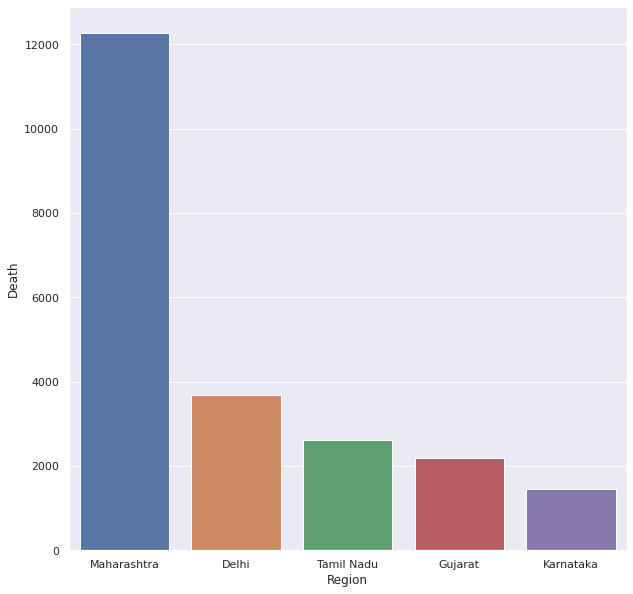

In [9]:
# Making bar graph of top death states

sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(x='Region',y='Death', data=top_death_states)
plt.show()

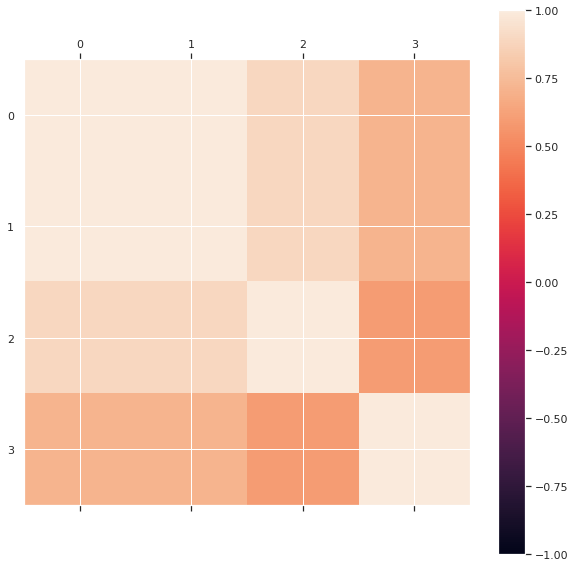

In [10]:
 correlations=a.corr()
 fig=plt.figure()
 ax=fig.add_subplot(111)
 cax=ax.matshow(correlations,vmin=-1,vmax=1)
 fig.colorbar(cax)

# **Assigning the dataset**

In [11]:
# split the dataset to X and y

X = a.iloc[:, [1, 3]].values
y = a.iloc[:, 4].values

In [12]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler()
X=mmscaler.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 30)

In [14]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred=lr.predict(X_test)

In [16]:
 from sklearn.metrics import mean_squared_error

In [17]:
mean_squared_error(y_pred,y_test)

0.1995129832470408

In [18]:
# KNN Regressor

from sklearn.neighbors import KNeighborsRegressor
neigh=KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train,y_train)

KNeighborsRegressor()

In [19]:
y_pr=neigh.predict(X_test)
mean_squared_error(y_test,y_pr)

0.24000000000000002

In [20]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=30, max_depth=10)
tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=30)

In [21]:
y_pre=tree.predict(X_test)

In [22]:
mean_squared_error(y_pre,y_test)

0.2222222222222222

In [23]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
Regressor = RandomForestRegressor(n_estimators = 10, random_state = 30)
Regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=30)

In [24]:
y_es=Regressor.predict(X_test)
mean_squared_error(y_test,y_es)

0.1111111111111111